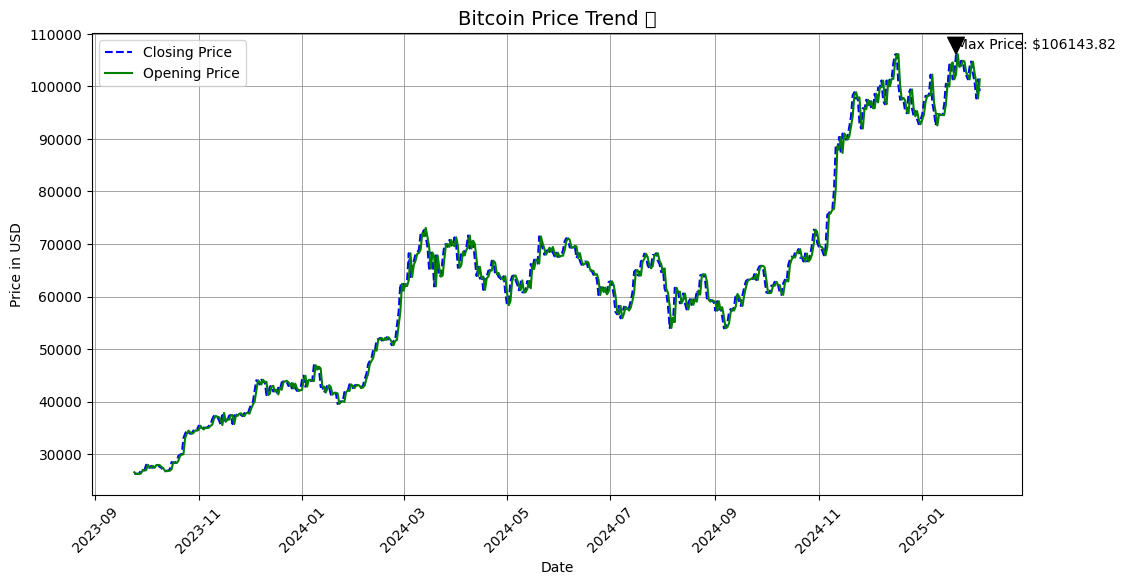

In [25]:
# Run this cell first
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Load Bitcoin Data
df = pd.read_csv("../data/btc_data.csv", index_col="timestamp", parse_dates=True)

# Plot Bitcoin Price Trend with Customizations
plt.figure(figsize=(12,6))

# Change line style and color
sns.lineplot(x=df.index, y=df["close"], label="Closing Price", color="blue", linestyle='--')

# Add annotations
max_price = df["close"].max()
max_date = df["close"].idxmax() # Get the date of the max price by finding the index value of the first occurrence of the maximum value
plt.annotate(f'Max Price: ${max_price}', xy=(max_date, max_price), xytext=(max_date, max_price + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Customize the grid
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Add multiple lines (e.g., opening price)
sns.lineplot(x=df.index, y=df["open"], label="Opening Price", color="green")

plt.title("Bitcoin Price Trend 📈", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.xticks(rotation=45)
plt.legend()
plt.show()


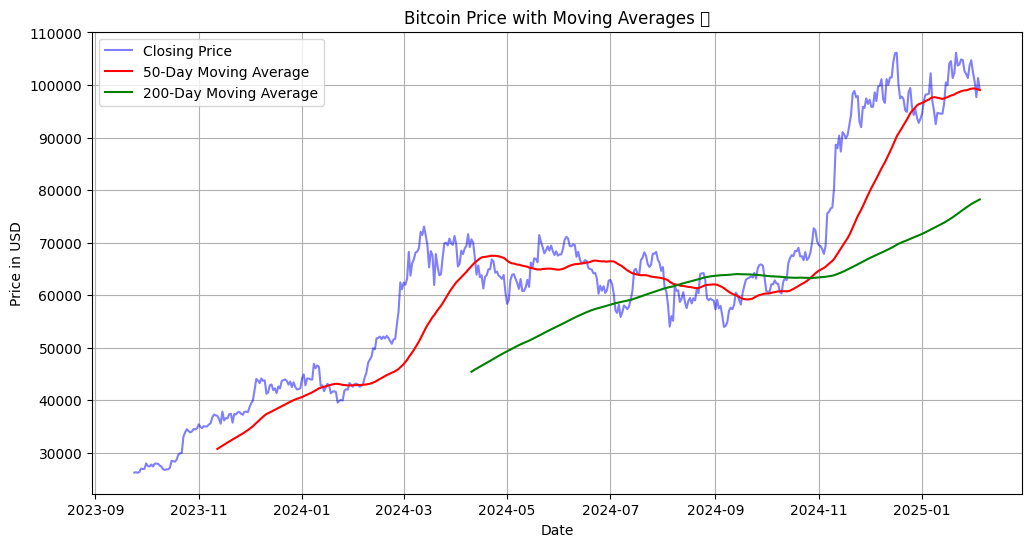

In [ ]:
# Compute Moving Averages
df["50_MA"] = df["close"].rolling(window=50).mean()  # 50-day Moving Average
df["200_MA"] = df["close"].rolling(window=200).mean()  # 200-day Moving Average

# Plot Closing Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df.index, df["close"], label="Closing Price", color="blue", alpha=0.5)
plt.plot(df.index, df["50_MA"], label="50-Day Moving Average", color="red")
plt.plot(df.index, df["200_MA"], label="200-Day Moving Average", color="green")
plt.title("Bitcoin Price with Moving Averages 🚀")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()

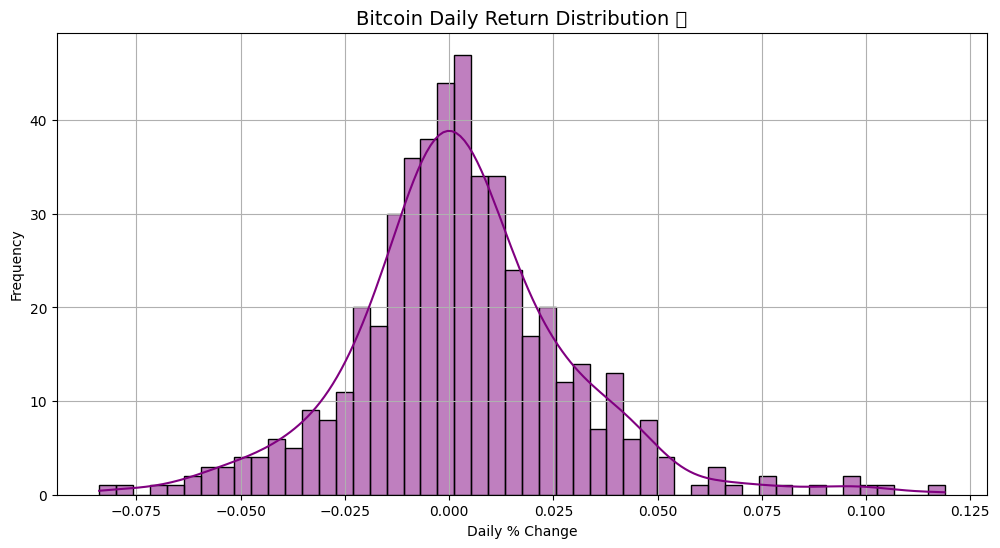

In [26]:
df["daily_return"] = df["close"].pct_change()  # Percentage Change

# Plot Daily Returns
plt.figure(figsize=(12,6))
sns.histplot(df["daily_return"].dropna(), bins=50, kde=True, color="purple")
plt.title("Bitcoin Daily Return Distribution 📊", fontsize=14)
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

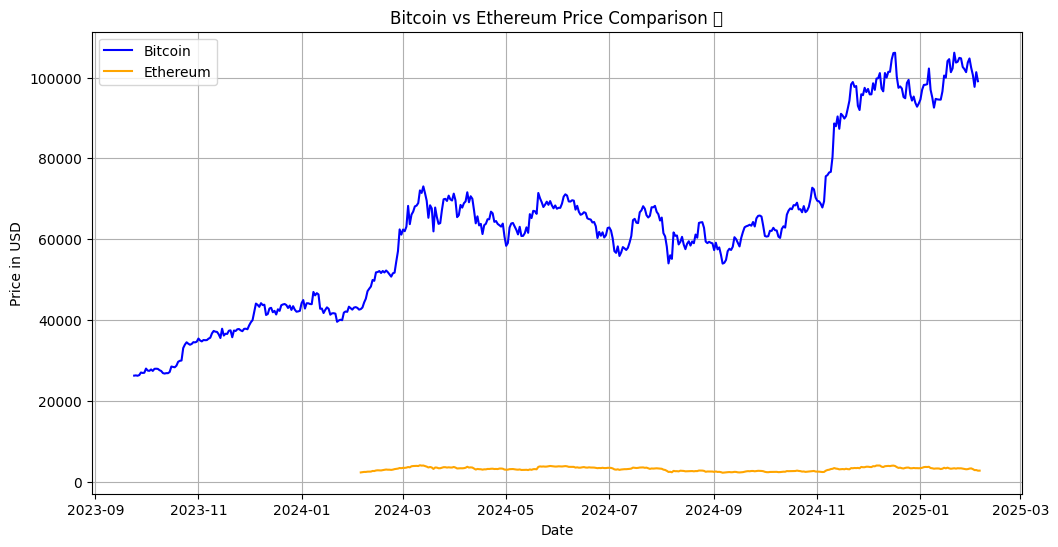

In [27]:

import yfinance as yf

# Fetch Ethereum Data from Yahoo Finance
eth = yf.Ticker("ETH-USD")
eth_df = eth.history(period="1y")  # Last 1 year of data

# Plot BTC vs ETH Prices
plt.figure(figsize=(12,6))
plt.plot(df.index, df["close"], label="Bitcoin", color="blue")
plt.plot(eth_df.index, eth_df["Close"], label="Ethereum", color="orange")
plt.title("Bitcoin vs Ethereum Price Comparison 🔥")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()
